# Deep Learning Project 1 - MLPs and CNN for image classification

In [3]:
%load_ext autoreload
%autoreload 2

## Introduction
Submit a report (max. 5 pages, PDF format) for the following machine learning projects that follow. Explain briefly in the report the architectures that you used, how they were trained, tuned, etc. Describe challenges and problems and how they were addressed. Present in the report your experimental results and demos (e.g., screenshots) showing how your code works. Do not include code in the report, but include a link to a shared folder or repository (e.g. in Dropbox, GitHub, Bitbucket) containing your code. The project will contribute 30% to the final grade.

## Fashion item recognition
Given an image of a fashion item, build a deep learning model that recognizes the fashion item. You must use at least 2 different architectures, one with MLPs and one with CNNs. Use the Fashion-MNIST dataset to train and evaluate your models. More information about the task and the dataset can be found at 

https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

In [4]:
import sys
import gc
import pandas as pd

sys.path.append("../lib/")

In [5]:
labels = {
    0: "T-shirt/tip",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

def get_label(index: int):
    return labels.get(index, "undefined")

In [6]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.abspath(os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind))
    images_path = os.path.abspath(os.path.join(path, '%s-images-idx3-ubyte.gz' % kind))

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [7]:
train_images_original, train_labels_original = load_mnist("../../data", "train")
test_images_original, test_labels_original = load_mnist("../../data", "t10k")

In [8]:
import numpy as np
train_images = np.copy(train_images_original)
train_labels = np.copy(train_labels_original)
test_images = np.copy(test_images_original)
test_labels = np.copy(test_labels_original)

In [9]:
print("Train Images: ", train_images.shape)
print("Train Labels: ", len(train_labels))
print()
print("Test Images: ", test_images.shape)
print("Test Labels: ", len(test_labels))

Train Images:  (60000, 784)
Train Labels:  60000

Test Images:  (10000, 784)
Test Labels:  10000


## Resources

- https://www.tensorflow.org/tutorials/keras/classification
- https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/
- https://github.com/zalandoresearch/fashion-mnist
- https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [10]:
train_images_count = 60000
test_images_count = 10000
image_size = 28

In [11]:
train_images = train_images.reshape((train_images_count, image_size, image_size))/255.0
test_images = test_images.reshape((test_images_count, image_size, image_size))/255.0

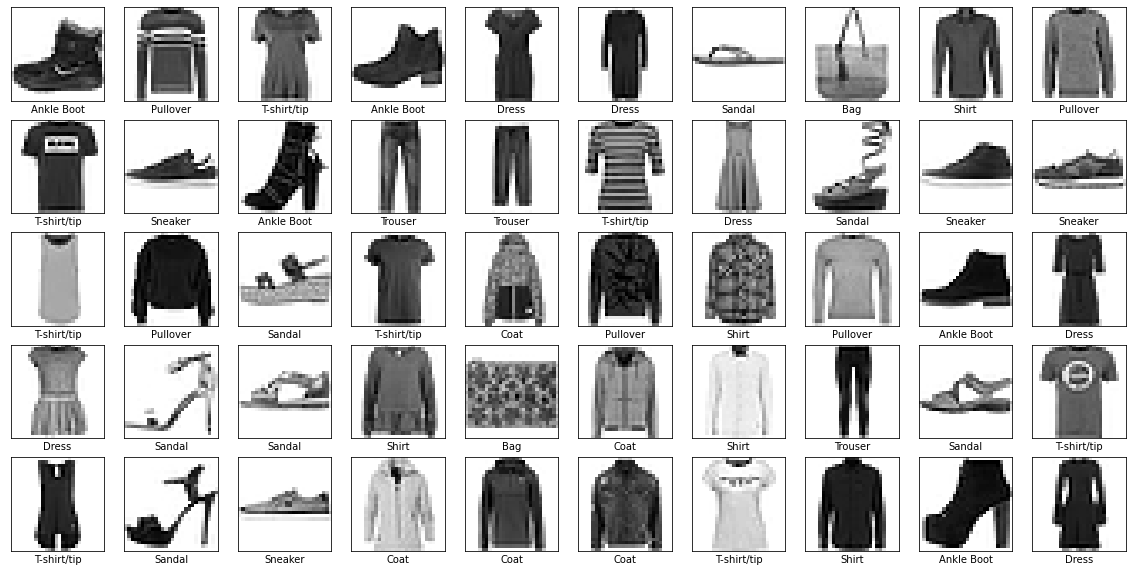

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(20, 10))

for i in range(0, 50):
    ax = axes[int(i%5), int(i/5)]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(train_images[i], cmap=plt.cm.binary)
    ax.set_xlabel(get_label(train_labels[i]))

## Split data

In [13]:
random_state = 19870127

The train images are evenly distribution across all classes with every class having 6000 images o the type so we don't need to take any measures to prevent class overfitting.

In [14]:
counts_per_class = np.unique(train_labels, return_counts=True)
display(counts_per_class)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

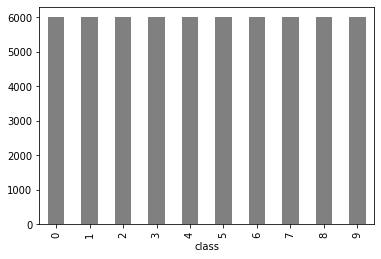

In [15]:
class_dist = pd.DataFrame(train_labels, columns=["class"])
class_dist['class'].groupby(class_dist["class"]).count().plot(kind = "bar", color = 'gray')

Splitting train set to **80%** used for training and **20%** used for validation

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, stratify = train_labels, test_size=0.20, random_state=random_state)

In [17]:
import tensorflow as tf
display(tf.config.list_physical_devices())
display("Tensorflow version " + tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

'Tensorflow version 2.1.0'

In [18]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import layers

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

## MLP

In [71]:
from DeepLearning import MLP, Visualize

### MLP Template

In [ ]:
baseline_model , baseline_history = MLP.train((X_train, y_train), (X_val, y_val), name="baseline_model", dense_layers=None, verbose=0, epochs=300)
Visualize.history({"baseline_model": baseline_history})
evaluation = MLP.evaluate(baseline_model, test_images, test_labels)
MLP.summary(history, evaluation)

Model: "baseline_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_output_softmax (Dense) (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Compile with optimizers: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fafeb555910>
Fitting for 300 epochs 
with 128 batch_size and 
callbacks[<tensorflow.python.keras.callbacks.EarlyStopping object at 0x7fafc00fd2d0>, <tensorflow.python.keras.callbacks.ReduceLROnPlateau object at 0x7fafa4088ed0>]


Train loss 1.5498209603627522
Validation loss 1.5654300346374512
Test loss 1.5751310497283935
Train categorical accuracy 0.9114791750907898
Validation categorical accuracy 0.8947499990463257
Test categorical accuracy 0.8849999904632568


In [ ]:
layers = [
    {"units": 256, "activation": "relu", "dropout": 0.25},
    {"units": 64, "activation": "relu", "dropout": 0.25}
]

# callbacks= [MLP.earlyStopping]

### Baseline Model

In [ ]:
# inputs = layers.Input(shape=(28,28), name='icons')
# flatten_input  = layers.Flatten(input_shape = (28, 28))(inputs)
# first_dense_layer  = layers.Dense(128, activation=tf.nn.relu, name='dense_1_64_relu')(flatten_input)
# second_dense_layer = layers.Dense(64, activation=tf.nn.relu, name='dense_2_64_relu')(first_dense_layer)
# outputs = layers.Dense(10, name="dence_output_softmax", activation=tf.nn.softmax)(second_dense_layer)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

# del baseline_model

baseline_model = Sequential(name = "baseline_model")
baseline_model.add(Input(shape = (28, 28), name = 'icons_input'))
baseline_model.add(Flatten(input_shape = (28, 28), name = "flatten_input"))
baseline_model.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))

optimizer = tf.keras.optimizers.Adam()

baseline_model.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

history = baseline_model.fit(
    X_train, y_train, 
    epochs=300,
    validation_data=(X_val, y_val),
    batch_size = 128,
    verbose = 1
)

#### Model Preview

In [ ]:
display(baseline_model.summary())

#### Plot History

In [20]:
DeepLearning.Visualization.plot_history({"baseline_model": history})

AttributeError: module 'DeepLearning' has no attribute 'Visualization'

#### Evaluate

In [ ]:
test_loss, test_acc = baseline_model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

I have trained the model for only 5 epocks, as we can see on the history plots both train and validation loss are still droping so there is still room for improvement
as a first measure i will increase the epochs to a large number e.g. 100 to see how much it can be dropped

#### For for more epochs

In [ ]:
baseline_model_1 = Sequential(name = "baseline_model")
baseline_model_1.add(Input(shape = (28, 28), name = 'icons_input'))
baseline_model_1.add(Flatten(input_shape = (28, 28), name = "flatten_input"))
baseline_model_1.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))

optimizer = tf.keras.optimizers.Adam(lr=0.001)

baseline_model_1.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

history = baseline_model_1.fit(
    X_train, y_train, 
    epochs = 1000,
    validation_data=(X_val, y_val),
    batch_size = 128,
    verbose = 0
)

In [ ]:
DeepLearning.Visualization.plot_history({"baseline_model_more_epochs": history})

It seems that the validation is stable after some epochs, I will try a new mlp with more capacity as the one we have now has only the input and the classification output layer with softmax

### Higher Capacity 1 Layer 32 Units

Adding 1 more dense layer

In [ ]:
# inputs = layers.Input(shape=(28,28), name='icons')
# flatten_input  = layers.Flatten(input_shape = (28, 28))(inputs)
# first_dense_layer  = layers.Dense(128, activation=tf.nn.relu, name='dense_1_64_relu')(flatten_input)
# second_dense_layer = layers.Dense(64, activation=tf.nn.relu, name='dense_2_64_relu')(first_dense_layer)
# outputs = layers.Dense(10, name="dence_output_softmax", activation=tf.nn.softmax)(second_dense_layer)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model_hc_1_32 = Sequential(name = "mode_1_layer_32")
model_hc_1_32.add(Input(shape = (28, 28), name = 'icons_input'))
model_hc_1_32.add(Flatten(input_shape = (28, 28), name = "flatten_input"))
model_hc_1_32.add(Dense(32, activation = tf.nn.relu, name = "dense_layer_1"))
model_hc_1_32.add(Dropout(0.2))
model_hc_1_32.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))

optimizer = tf.keras.optimizers.Adam()

model_hc_1_32.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

history = model_hc_1_32.fit(
    X_train, y_train, 
    epochs=300,
    validation_data=(X_val, y_val),
    batch_size = 128,
    verbose = 1
)

#### Model Preview

In [ ]:
display(model_hc_1_32.summary())

#### Plot History

In [ ]:
Visualization.plot_history({"model_hc_1_32": history})

#### Evaluate

In [ ]:
test_loss, test_acc = model_hc_1_32.evaluate(test_images,  test_labels, verbose=0)

print('Test Loss: ', test_loss)
print('Test Categorical Accuracy:', test_acc)

### Higher Capacity 1 Layer 64

Adding 1 more dense layer

In [ ]:
# inputs = layers.Input(shape=(28,28), name='icons')
# flatten_input  = layers.Flatten(input_shape = (28, 28))(inputs)
# first_dense_layer  = layers.Dense(128, activation=tf.nn.relu, name='dense_1_64_relu')(flatten_input)
# second_dense_layer = layers.Dense(64, activation=tf.nn.relu, name='dense_2_64_relu')(first_dense_layer)
# outputs = layers.Dense(10, name="dence_output_softmax", activation=tf.nn.softmax)(second_dense_layer)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model_hc_1_64 = Sequential(name = "mode_1_layer_64")
model_hc_1_64.add(Input(shape = (28, 28), name = 'icons_input'))
model_hc_1_64.add(Flatten(input_shape = (28, 28), name = "flatten_input"))
model_hc_1_64.add(Dense(64, activation = tf.nn.relu, name = "dense_layer_1"))
model_hc_1_64.add(Dropout(0.2))
model_hc_1_64.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))

optimizer = tf.keras.optimizers.Adam()

model_hc_1_64.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

history = model_hc_1_64.fit(
    X_train, y_train, 
    epochs=300,
    validation_data=(X_val, y_val),
    batch_size = 128,
    verbose = 0
)

#### Model Preview

In [ ]:
display(model_hc_1_64.summary())

#### Plot History

In [ ]:
Visualization.plot_history({"model_hc_1_64": history})

#### Evaluate

In [ ]:
test_loss, test_acc = model_hc_1_64.evaluate(test_images,  test_labels, verbose=0)

print('Test Loss: ', test_loss)
print('Test Categorical Accuracy:', test_acc)

### Higher Capacity 1 Layer 128

Adding 1 more dense layer

In [ ]:
# inputs = layers.Input(shape=(28,28), name='icons')
# flatten_input  = layers.Flatten(input_shape = (28, 28))(inputs)
# first_dense_layer  = layers.Dense(128, activation=tf.nn.relu, name='dense_1_64_relu')(flatten_input)
# second_dense_layer = layers.Dense(64, activation=tf.nn.relu, name='dense_2_64_relu')(first_dense_layer)
# outputs = layers.Dense(10, name="dence_output_softmax", activation=tf.nn.softmax)(second_dense_layer)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model_hc_1_128 = Sequential(name = "model_hc_1_128")
model_hc_1_128.add(Input(shape = (28, 28), name = 'icons_input'))
model_hc_1_128.add(Flatten(input_shape = (28, 28), name = "flatten_input"))
model_hc_1_128.add(Dense(128, activation = tf.nn.relu, name = "dense_layer_1"))
model_hc_1_128.add(Dropout(0.2))
model_hc_1_128.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))

optimizer = tf.keras.optimizers.Adam()

model_hc_1_128.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

history = model_hc_1_128.fit(
    X_train, y_train, 
    epochs=300,
    validation_data=(X_val, y_val),
    batch_size = 128,
    verbose = 0
)

#### Model Preview

In [ ]:
display(model_hc_1_128.summary())

#### Plot History

In [ ]:
Visualization.plot_history({"model_hc_1_128": history})

#### Evaluate

In [ ]:
test_loss, test_acc = model_hc_1_128.evaluate(test_images,  test_labels, verbose=0)

print('Test Loss: ', test_loss)
print('Test Categorical Accuracy:', test_acc)

### Higher Capacity 1 Layer 256

Adding 1 more dense layer

In [ ]:
# inputs = layers.Input(shape=(28,28), name='icons')
# flatten_input  = layers.Flatten(input_shape = (28, 28))(inputs)
# first_dense_layer  = layers.Dense(128, activation=tf.nn.relu, name='dense_1_64_relu')(flatten_input)
# second_dense_layer = layers.Dense(64, activation=tf.nn.relu, name='dense_2_64_relu')(first_dense_layer)
# outputs = layers.Dense(10, name="dence_output_softmax", activation=tf.nn.softmax)(second_dense_layer)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model_hc_1_256 = Sequential(name = "model_hc_1_256")
model_hc_1_256.add(Input(shape = (28, 28), name = 'icons_input'))
model_hc_1_256.add(Flatten(input_shape = (28, 28), name = "flatten_input"))
model_hc_1_256.add(Dense(256, activation = tf.nn.relu, name = "dense_layer_1"))
model_hc_1_256.add(Dropout(0.2))
model_hc_1_256.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))

optimizer = tf.keras.optimizers.Adam()

model_hc_1_256.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

history = model_hc_1_256.fit(
    X_train, y_train, 
    epochs=300,
    validation_data=(X_val, y_val),
    batch_size = 128,
    verbose = 0
)

#### Model Preview

In [ ]:
display(model_hc_1_256.summary())

#### Plot History

In [ ]:
Visualization.plot_history({"model_hc_1_256": history})

#### Evaluate

In [ ]:
test_loss, test_acc = model_hc_1_128.evaluate(test_images,  test_labels, verbose=0)

print('Test Loss: ', test_loss)
print('Test Categorical Accuracy:', test_acc)

### Higher Capacity 1 Layer 256

Adding 1 more dense layer

In [ ]:
# inputs = layers.Input(shape=(28,28), name='icons')
# flatten_input  = layers.Flatten(input_shape = (28, 28))(inputs)
# first_dense_layer  = layers.Dense(128, activation=tf.nn.relu, name='dense_1_64_relu')(flatten_input)
# second_dense_layer = layers.Dense(64, activation=tf.nn.relu, name='dense_2_64_relu')(first_dense_layer)
# outputs = layers.Dense(10, name="dence_output_softmax", activation=tf.nn.softmax)(second_dense_layer)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model_hc_1_512 = Sequential(name = "model_hc_1_512")
model_hc_1_512.add(Input(shape = (28, 28), name = 'icons_input'))
model_hc_1_512.add(Flatten(input_shape = (28, 28), name = "flatten_input"))
model_hc_1_512.add(Dense(256, activation = tf.nn.relu, name = "dense_layer_1"))
model_hc_1_512.add(Dropout(0.2))
model_hc_1_512.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))

optimizer = tf.keras.optimizers.Adam()

model_hc_1_512.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

history = model_hc_1_512.fit(
    X_train, y_train, 
    epochs=300,
    validation_data=(X_val, y_val),
    batch_size = 128,
    callbacks=[earlyStopping],
    verbose = 0
)

#### Model Preview

In [ ]:
display(model_hc_1_512.summary())

#### Plot History

In [ ]:
Visualization.plot_history({"model_hc_1_512": history})

#### Evaluate

In [ ]:
test_loss, test_acc = model_hc_1_512.evaluate(test_images,  test_labels, verbose=0)

print('Test Loss: ', test_loss)
print('Test Categorical Accuracy:', test_acc)

### Earlystopping 

Reference
- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

Arguments:
- **monitor:** Quantity to be monitored.
- **min_delta:** Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
- **patience:** Number of epochs with no improvement after which training will be stopped.
- **verbose:** verbosity mode.
- **mode:** One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- **baseline:** Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
- **restore_best_weights:** Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

In [30]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10, 
    verbose=1
)

In [ ]:
model_2_es = Sequential(name = "model_2_es")
model_2_es.add(Input(shape = (28, 28), name = 'icons_input'))
model_2_es.add(Flatten(input_shape = (28, 28), name = "flatten_input"))
model_2_es.add(Dense(128, activation = tf.nn.relu, name = "dense_1"))
model_2_es.add(Dropout(0.2, name="dropout_1"))
# model_2_es.add(Dense(128, activation = tf.nn.relu, name = "dense_2"))
# model_2_es.add(Dropout(0.2, name="dropout_2"))
# model_2_es.add(Dense(64, activation = tf.nn.softmax, name = "dense_2"))
# model_2_es.add(Dropout(0.2, name="dropout_2"))
model_2_es.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))

optimizer = tf.keras.optimizers.Adam(lr=0.001)

model_2_es.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

display(model_2_es.summary())

history = model_2_es.fit(
    X_train, y_train, 
    epochs=300,
    validation_data=(X_val, y_val),
    batch_size = 128,
#     callbacks = [earlyStopping],
    verbose = 1
)

#### Plot History

In [ ]:
from dl import Visualization

Visualization.plot_history({"model_2_es": history})

#### Evaluate

In [ ]:
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=0)

print('Test Loss: ', test_loss)
print('Test Categorical Accuracy:', test_acc)

It seams that as far as i increase the mlp model capacity it doesn't overfit the train dataset and the maximum categorical accuracy is 0.856

Probably i could increase the capacity more but it seams that model type is not the best for the current data.

### Talos

I am gonna use Early stopping for all my fits so that the model does not overfit the train data to the point where it starts to lose accuracy on validation.

This will help me add more epochs and the fit will stop at the point that validation accuracy drops.

For early stopping i ll monitor `val_sparse_categorical_accuracy` and add a paetience of 20 epochs to give a slack
for when the increment in train accuaracy does not have an immediate effect in validation accuracy.




In [ ]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_sparse_categorical_accuracy",
    patience=20, 
    verbose=1
)

In [ ]:
import talos
import pandas as pd
from talos.model.normalizers import lr_normalizer
from talos.model.early_stopper import early_stopper

In [ ]:
# then we can go ahead and set the parameter space
p = {
    'first_neuron':[32, 64, 128, 256], #[32, 64, 128, 256],
    'second_neuron':[32, 64, 128, 256], #[32, 64, 128, 256],
    'batch_size': [32, 64, 128], #[16, 32, 64, 128],
    'epochs': [500], # A Big nunber of epochs Early stopping will save extra time in case val categorical accuracy starts to drop
    'dropout': [0.2, 0.25], #[0.1, 0.2, 0.25],
    'optimizer': ['Adam', 'Nadam'], #'['Nadam', 'Adam'],
    'activation':['relu'],
    'last_activation': ['softmax']
}

# and run the experiment
t = talos.Scan(
    x=X_train, 
    y = y_train,
    model=mlp_model,
    params=p,
    x_val=X_val,
    y_val=y_val,
    experiment_name='fashion_minst_mlp',
#     round_limit=10,
    print_params=True
)

In [ ]:
analyze_object = talos.Analyze(t)

results = pd.DataFrame(analyze_object.data)
results.to_csv("results_mlp.csv")

## CNN

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model

In [27]:
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val_cnn = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test_cnn = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [28]:
print(y_train.shape)

(48000,)


In [31]:
model = Sequential()
model.add(Input(shape = (28, 28, 1), name = 'icons_input'))
model.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    activation='relu', 
    strides=(1, 1),
    padding='same',
    dilation_rate=(1, 1),
    name='Conv2d-1'
))

model.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='same',
    name='MaxPool2D-1'
))

model.add(Dropout(0.2))

model.add(Conv2D(
    filters=128, 
    kernel_size=(3, 3), 
    activation='relu', 
    strides=(1, 1),
    padding='same',
    dilation_rate=(1, 1),
    name='Conv2d-2'
))

model.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='same',
    name='MaxPool2D-2'
))

model.add(Dropout(0.2))

model.add(Flatten(name = "last_flatten"))
model.add(Dense(10, activation = tf.nn.softmax, name = "dense_output_softmax"))
optimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(
    optimizer = optimizer,
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.sparse_categorical_accuracy]
)

history = model.fit(
    X_train_cnn, y_train, 
    epochs=100,
    validation_data=(X_val_cnn, y_val),
    batch_size = 128,
    callbacks = [earlyStopping],
    verbose = 1
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 55s 1ms/sample - loss: 0.5460 - sparse_categorical_accuracy: 0.8019 - val_loss: 0.3815 - val_sparse_categorical_accuracy: 0.8681
Epoch 2/100
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.3527 - sparse_categorical_accuracy: 0.8736 - val_loss: 0.3184 - val_sparse_categorical_accuracy: 0.8906
Epoch 3/100
48000/48000 [==============================] - 55s 1ms/sample - loss: 0.3114 - sparse_categorical_accuracy: 0.8878 - val_loss: 0.2960 - val_sparse_categorical_accuracy: 0.8975
Epoch 4/100
48000/48000 [==============================] - 55s 1ms/sample - loss: 0.2800 - sparse_categorical_accuracy: 0.9001 - val_loss: 0.2742 - val_sparse_categorical_accuracy: 0.9053
Epoch 5/100
48000/48000 [==============================] - 55s 1ms/sample - loss: 0.2597 - sparse_categorical_accuracy: 0.9056 - val_loss: 0.2805 - val_sparse_categorical_accuracy: 0.9016
Epoch 6/10

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2d-1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
MaxPool2D-1 (MaxPooling2D)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
Conv2d-2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
MaxPool2D-2 (MaxPooling2D)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
last_flatten (Flatten)       (None, 6272)             

In [ ]:
from dl import Visualization

Visualization.plot_history({"model": history})

In [34]:
test_loss, test_acc = model.evaluate(X_test_cnn,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 148us/sample - loss: 0.2469 - sparse_categorical_accuracy: 0.9236
Test accuracy: 0.9236
